In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('pulsar_data_train.csv')

In [3]:
data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [4]:
data.isna().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [5]:
data.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                     float64
dtype: object

0.0    11375
1.0     1153
Name: target_class, dtype: int64


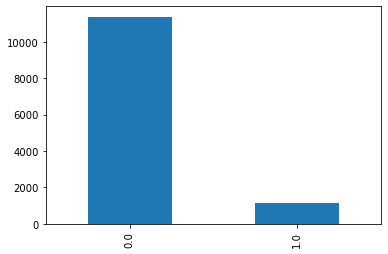

In [6]:
data['target_class'].value_counts().plot(kind = 'bar')
print(data['target_class'].value_counts())

In [7]:
#Checking the % of the the targe_class
data['target_class'].value_counts()/np.float(len(data))

0.0    0.907966
1.0    0.092034
Name: target_class, dtype: float64

In [8]:
col_names = data.columns
col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [9]:
#We can see that there are leading spaces (spaces at the start of the string name) in the dataframe. So, I will remove these leading spaces.
data.columns = data.columns.str.strip()

In [10]:
data.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

<AxesSubplot:xlabel='Excess kurtosis of the integrated profile'>

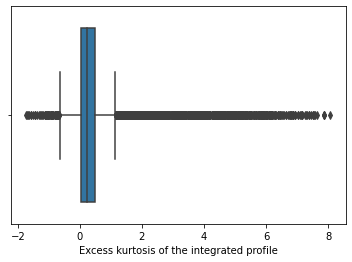

In [11]:
sns.boxplot(data['Excess kurtosis of the integrated profile'])

In [12]:
data['Excess kurtosis of the integrated profile'].median()

0.2236779589999999

In [13]:
data['Standard deviation of the DM-SNR curve'].median()

18.412401765

In [14]:
data['Skewness of the integrated profile'].median()

0.20331698450000002

In [15]:
#Filling the null values with median
data['Excess kurtosis of the integrated profile'].fillna(data['Excess kurtosis of the integrated profile'].median() , inplace=True)
data['Standard deviation of the DM-SNR curve'].fillna(data['Standard deviation of the DM-SNR curve'].median() , inplace=True)
data['Skewness of the DM-SNR curve'].fillna(data['Skewness of the DM-SNR curve'].median(),inplace=True)

In [16]:
data.isna().sum()

Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
target_class                                    0
dtype: int64

Text(0.5, 1.0, 'Skewness of the DM-SNR curve')

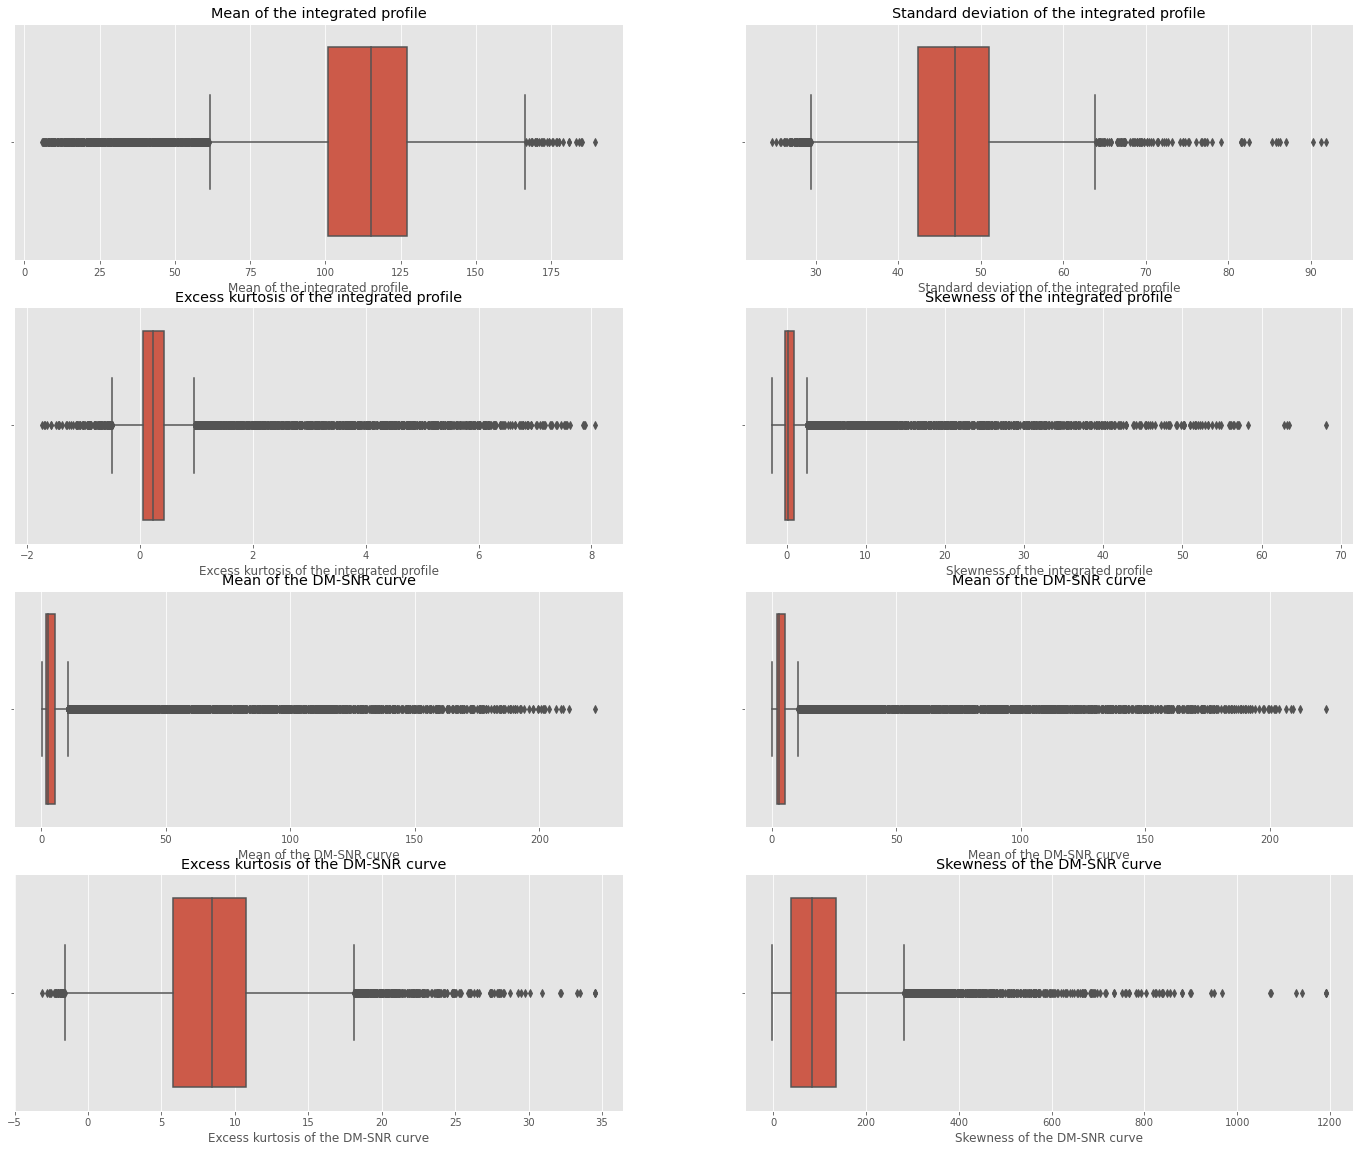

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(24,20))

plt.subplot(4,2,1)
sns.boxplot(data['Mean of the integrated profile'])
plt.title('Mean of the integrated profile')

plt.subplot(4,2,2)
sns.boxplot(data['Standard deviation of the integrated profile'])
plt.title('Standard deviation of the integrated profile')

plt.subplot(4,2,3)
sns.boxplot(data['Excess kurtosis of the integrated profile'])
plt.title('Excess kurtosis of the integrated profile')

plt.subplot(4,2,4)
sns.boxplot(data['Skewness of the integrated profile'])
plt.title('Skewness of the integrated profile')

plt.subplot(4,2,5)
sns.boxplot(data['Mean of the DM-SNR curve'])
plt.title('Mean of the DM-SNR curve')

plt.subplot(4,2,6)
sns.boxplot(data['Mean of the DM-SNR curve'])
plt.title('Mean of the DM-SNR curve')

plt.subplot(4,2,7)
sns.boxplot(data['Excess kurtosis of the DM-SNR curve'])
plt.title('Excess kurtosis of the DM-SNR curve  ')

plt.subplot(4,2,8)
sns.boxplot(data['Skewness of the DM-SNR curve'])
plt.title('Skewness of the DM-SNR curve')

###### >There are a lot pof outliers in our data
Handle outliers with SVMs
There are 2 variants of SVMs. They are hard-margin variant of SVM and soft-margin variant of SVM.

The hard-margin variant of SVM does not deal with outliers. In this case, we want to find the hyperplane with maximum margin such that every training point is correctly classified with margin at least 1. This technique does not handle outliers well.

Another version of SVM is called soft-margin variant of SVM. In this case, we can have a few points incorrectly classified or classified with a margin less than 1. But for every such point, we have to pay a penalty in the form of C parameter, which controls the outliers. Low C implies we are allowing more outliers and high C implies less outliers.

The message is that since the dataset contains outliers, so the value of C should be high while training the model.

Text(0.5, 1.0, 'Skewness of the DM-SNR curve')

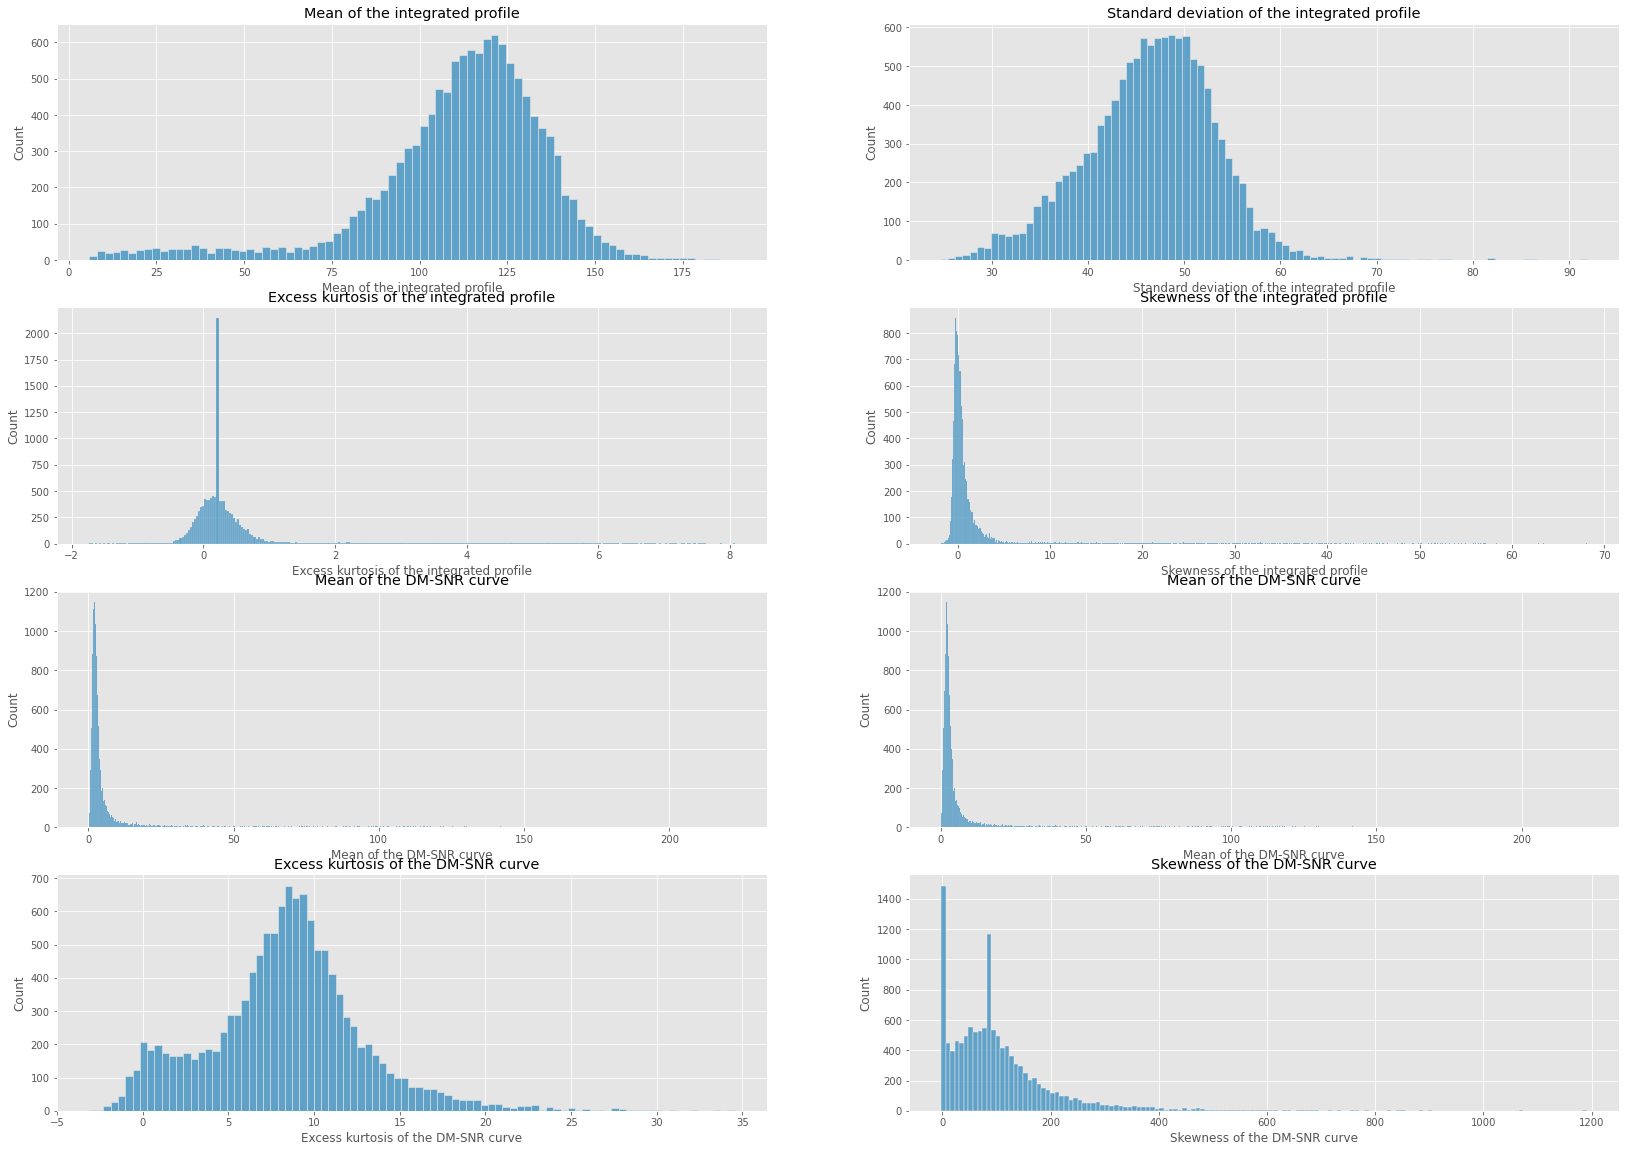

In [18]:
# plot histogram to check distribution


plt.figure(figsize=(28,20))

plt.subplot(4,2,1)
sns.histplot(data['Mean of the integrated profile'])
plt.title('Mean of the integrated profile')

plt.subplot(4,2,2)
sns.histplot(data['Standard deviation of the integrated profile'])
plt.title('Standard deviation of the integrated profile')

plt.subplot(4,2,3)
sns.histplot(data['Excess kurtosis of the integrated profile'])
plt.title('Excess kurtosis of the integrated profile')

plt.subplot(4,2,4)
sns.histplot(data['Skewness of the integrated profile'])
plt.title('Skewness of the integrated profile')

plt.subplot(4,2,5)
sns.histplot(data['Mean of the DM-SNR curve'])
plt.title('Mean of the DM-SNR curve')

plt.subplot(4,2,6)
sns.histplot(data['Mean of the DM-SNR curve'])
plt.title('Mean of the DM-SNR curve')

plt.subplot(4,2,7)
sns.histplot(data['Excess kurtosis of the DM-SNR curve'])
plt.title('Excess kurtosis of the DM-SNR curve  ')

plt.subplot(4,2,8)
sns.histplot(data['Skewness of the DM-SNR curve'])
plt.title('Skewness of the DM-SNR curve')

## Splitting the data

In [19]:
X = data.drop(['target_class'], axis=1)
y = data['target_class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((10022, 8), (2506, 8))

## Feature scaling

In [22]:
cols = X_train.columns

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test , columns = [cols])

##  Run SVM with default hyperparameters
Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

In [28]:
svc=SVC() 
svc.fit(X_train,y_train)
# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9792498004788508


### Run SVM with rbf kernel and C=100.0
We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=rbf and C=100.0.

In [29]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 
svc.fit(X_train,y_train)
# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9796488427773344


In [30]:
svc=SVC(C=1000.0) 
svc.fit(X_train,y_train)
# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9804


##### >>In this case, we can see that the accuracy had decreased with C=1000.0

##  Run SVM with linear kernel 

Run SVM with linear kernel and C=1.0

In [31]:
linear_svc=SVC(kernel='linear', C=1.0) 
linear_svc.fit(X_train,y_train)
# make predictions on test set
y_pred_test=linear_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9773


### Run SVM with linear kernel and C=100.0

In [32]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 
linear_svc100.fit(X_train, y_train)
# make predictions on test set
y_pred=linear_svc100.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9777


### Run SVM with linear kernel and C=1000.0

In [33]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 
linear_svc1000.fit(X_train, y_train)
# make predictions on test set
y_pred=linear_svc1000.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9777


In [34]:
#Compare the train-set and test-set accuracy
#Now, I will compare the train-set and test-set accuracy to check for overfitting.
y_pred_train = linear_svc.predict(X_train)
accuracy_score(y_train , y_pred_train)

0.9752544402314908

##### >> We can see that the training set and test-set accuracy are very much comparable

In [35]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9753
Test set score: 0.9773


##### >> The training-set accuracy score is 0.9753 while the test-set accuracy to be 0.9773. These two values are quite comparable. So, there is no question of overfitting.

#### >Compare model accuracy with null accuracy
So, the model accuracy is 0.9832. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [36]:
# check class distribution in test set

y_test.value_counts()

0.0    2285
1.0     221
Name: target_class, dtype: int64

In [37]:
# check null accuracy score

null_accuracy = (2275/(2275+221))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9115


###### >We can see that our model accuracy score is 0.9 but null accuracy score is 0.9753. So, we can conclude that our SVM classifier is doing a very good job in predicting the class labels.

## Run SVM with polynomial kernel 

In [38]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9749


### Run SVM with polynomial kernel and C=100.0

In [39]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9792


In [40]:
y_pred_train = poly_svc100.predict(X_train)
accuracy_score(y_train , y_pred_train)

0.9785471961684294

## Run SVM with sigmoid kernel

In [41]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8775


### Run SVM with sigmoid kernel and C=100.0

In [42]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8775


#### >> We get maximum accuracy with rbf and linear kernel with C=100.0. 